# Data Exploration and Loading

In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import tensorflow as tf
import cv2

import seaborn as sns
from PIL import Image

from tqdm import tqdm_notebook,tqdm

In [13]:
from keras import backend as K

In [14]:
PATH='../Data.nosync/'

In [15]:
train_labels=pd.read_csv(PATH +'MURA-v1.1/train_labeled_studies.csv',names=['img_path','label'])

In [16]:
test_labels=pd.read_csv(PATH +'MURA-v1.1/valid_labeled_studies.csv',names=['img_path','label'])

In [17]:
train_imgs_path=pd.read_csv(PATH+'MURA-v1.1/train_image_paths.csv',names=['img_path'])

In [18]:
test_imgs_path=pd.read_csv(PATH+'MURA-v1.1/train_image_paths.csv',names=['img_path'])

In [19]:
train_labels.head()

,img_path,label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1


In [20]:
test_labels.head()

,img_path,label
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1


In [21]:
data_source='../Data.nosync/'

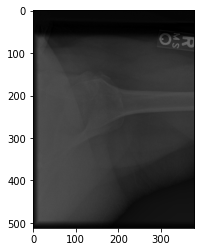

(512, 380, 3)


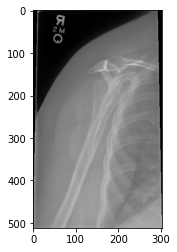

(512, 303, 3)


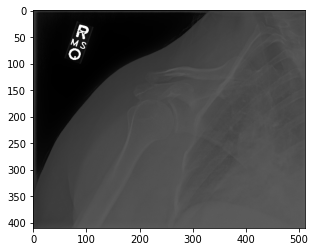

(410, 512, 3)


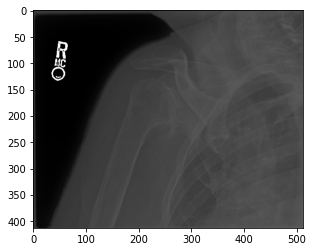

(413, 512, 3)


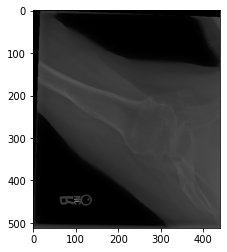

(512, 440, 3)


In [23]:
for path in train_imgs_path.values[:5]:
    img=cv2.imread(data_source+path[0])
    plt.imshow(plt.imread(data_source+path[0]))
    plt.imshow(img)
    plt.show()
    print (img.shape)

All images are very different sizes

In [22]:
train_labels['Body_Part']=train_labels['img_path'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['Study_Type']=train_labels['img_path'].apply(lambda x: str(x.split('/')[4])[:6])
test_labels['Body_Part']=test_labels['img_path'].apply(lambda x: str(x.split('/')[2])[3:])
test_labels['Study_Type']=test_labels['img_path'].apply(lambda x: str(x.split('/')[4])[:6])

In [23]:
train_labels.head()

,img_path,label,Body_Part,Study_Type
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,SHOULDER,study1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1,SHOULDER,study1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1,SHOULDER,study1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1,SHOULDER,study1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1,SHOULDER,study1


In [24]:
test_labels.head()

,img_path,label,Body_Part,Study_Type
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,WRIST,study1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1,WRIST,study1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1,WRIST,study2
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1,WRIST,study3
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1,WRIST,study1


<AxesSubplot:xlabel='Body_Part', ylabel='count'>

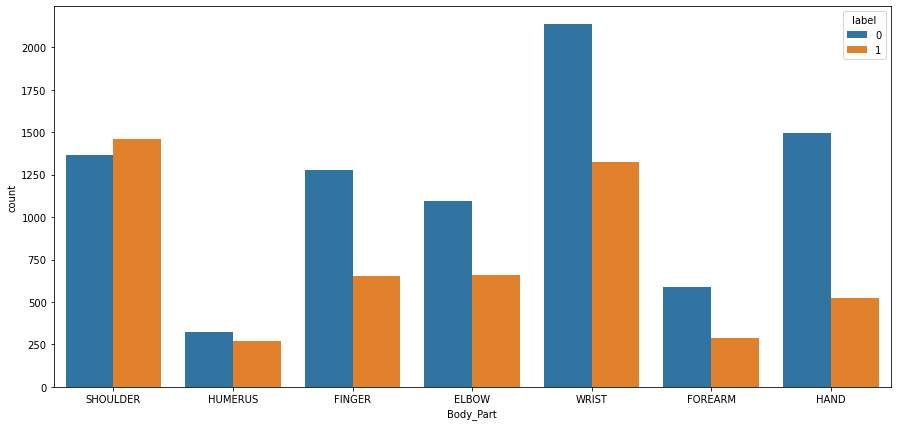

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(data=train_labels,x='Body_Part',hue='label')

In [26]:
train_labels[train_labels['Body_Part']=='SHOULDER']['label'].value_counts()

1    1457
0    1364
Name: label, dtype: int64

In [27]:
test_labels[test_labels['Body_Part']=='SHOULDER']['label'].value_counts()

0    99
1    95
Name: label, dtype: int64

In [28]:
train_labels['img_path']=train_imgs_path.iloc[:,0]
test_labels['img_path']=test_imgs_path.iloc[:,0]

In [29]:
test_shoulder=test_labels[test_labels['Body_Part']=='SHOULDER']

In [30]:
train_shoulder=train_labels[train_labels['Body_Part']=='SHOULDER']